### **Lab 3**

Assignment Details:

1. Data Analysis
    - Univariate 
    - Bivariate 
    - Multivariate
2. Feauture Engineering
3. Ensemble methods
    - Bagging 
    - Boosting
    - Random Forests
4. Hyperparameter Tuning
5. Final System

## Preprocessing data

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:


df = pd.read_csv("data/output_data.csv")
df = df.drop(columns=[df.columns[0]]) #Dropping ID column

print(df.columns)
print("-------------------------------")
print(df.shape)
print("-------------------------------")
print(df.head())

Index(['systolic', 'eyesight(left)', 'hearing(right)', 'ALT', 'relaxation',
       'Cholesterol', 'serum creatinine', 'AST', 'Gtp', 'hearing(left)',
       'smoking'],
      dtype='object')
-------------------------------
(159256, 11)
-------------------------------
   systolic  eyesight(left)  hearing(right)  ALT  relaxation  Cholesterol  \
0       135             0.5               1   25          87          172   
1       146             0.6               2   23          83          194   
2       118             0.4               1   31          75          178   
3       131             1.5               1   27          88          180   
4       121             1.5               1   13          76          155   

   serum creatinine  AST  Gtp  hearing(left)  smoking  
0               1.0   22   27              1        1  
1               1.1   27   37              2        0  
2               0.8   27   53              1        1  
3               1.0   20   30              1  

## Splitting Data

In [3]:
X = df.drop('smoking', axis=1)
y = df['smoking']

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (159256, 10), y shape: (159256,)


In [4]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(111479, 10)
(23889, 10)
(23888, 10)


## Step 1 | Data Analysis

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
159251    False
159252    False
159253    False
159254    False
159255    False
Length: 159256, dtype: bool

In [6]:
df.isnull().sum()

systolic            0
eyesight(left)      0
hearing(right)      0
ALT                 0
relaxation          0
Cholesterol         0
serum creatinine    0
AST                 0
Gtp                 0
hearing(left)       0
smoking             0
dtype: int64

### **1. Univariate Analysis**

1. Histogram per feature

array([[<Axes: title={'center': 'systolic'}>,
        <Axes: title={'center': 'eyesight(left)'}>,
        <Axes: title={'center': 'hearing(right)'}>],
       [<Axes: title={'center': 'ALT'}>,
        <Axes: title={'center': 'relaxation'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'serum creatinine'}>,
        <Axes: title={'center': 'AST'}>, <Axes: title={'center': 'Gtp'}>],
       [<Axes: title={'center': 'hearing(left)'}>,
        <Axes: title={'center': 'smoking'}>, <Axes: >]], dtype=object)

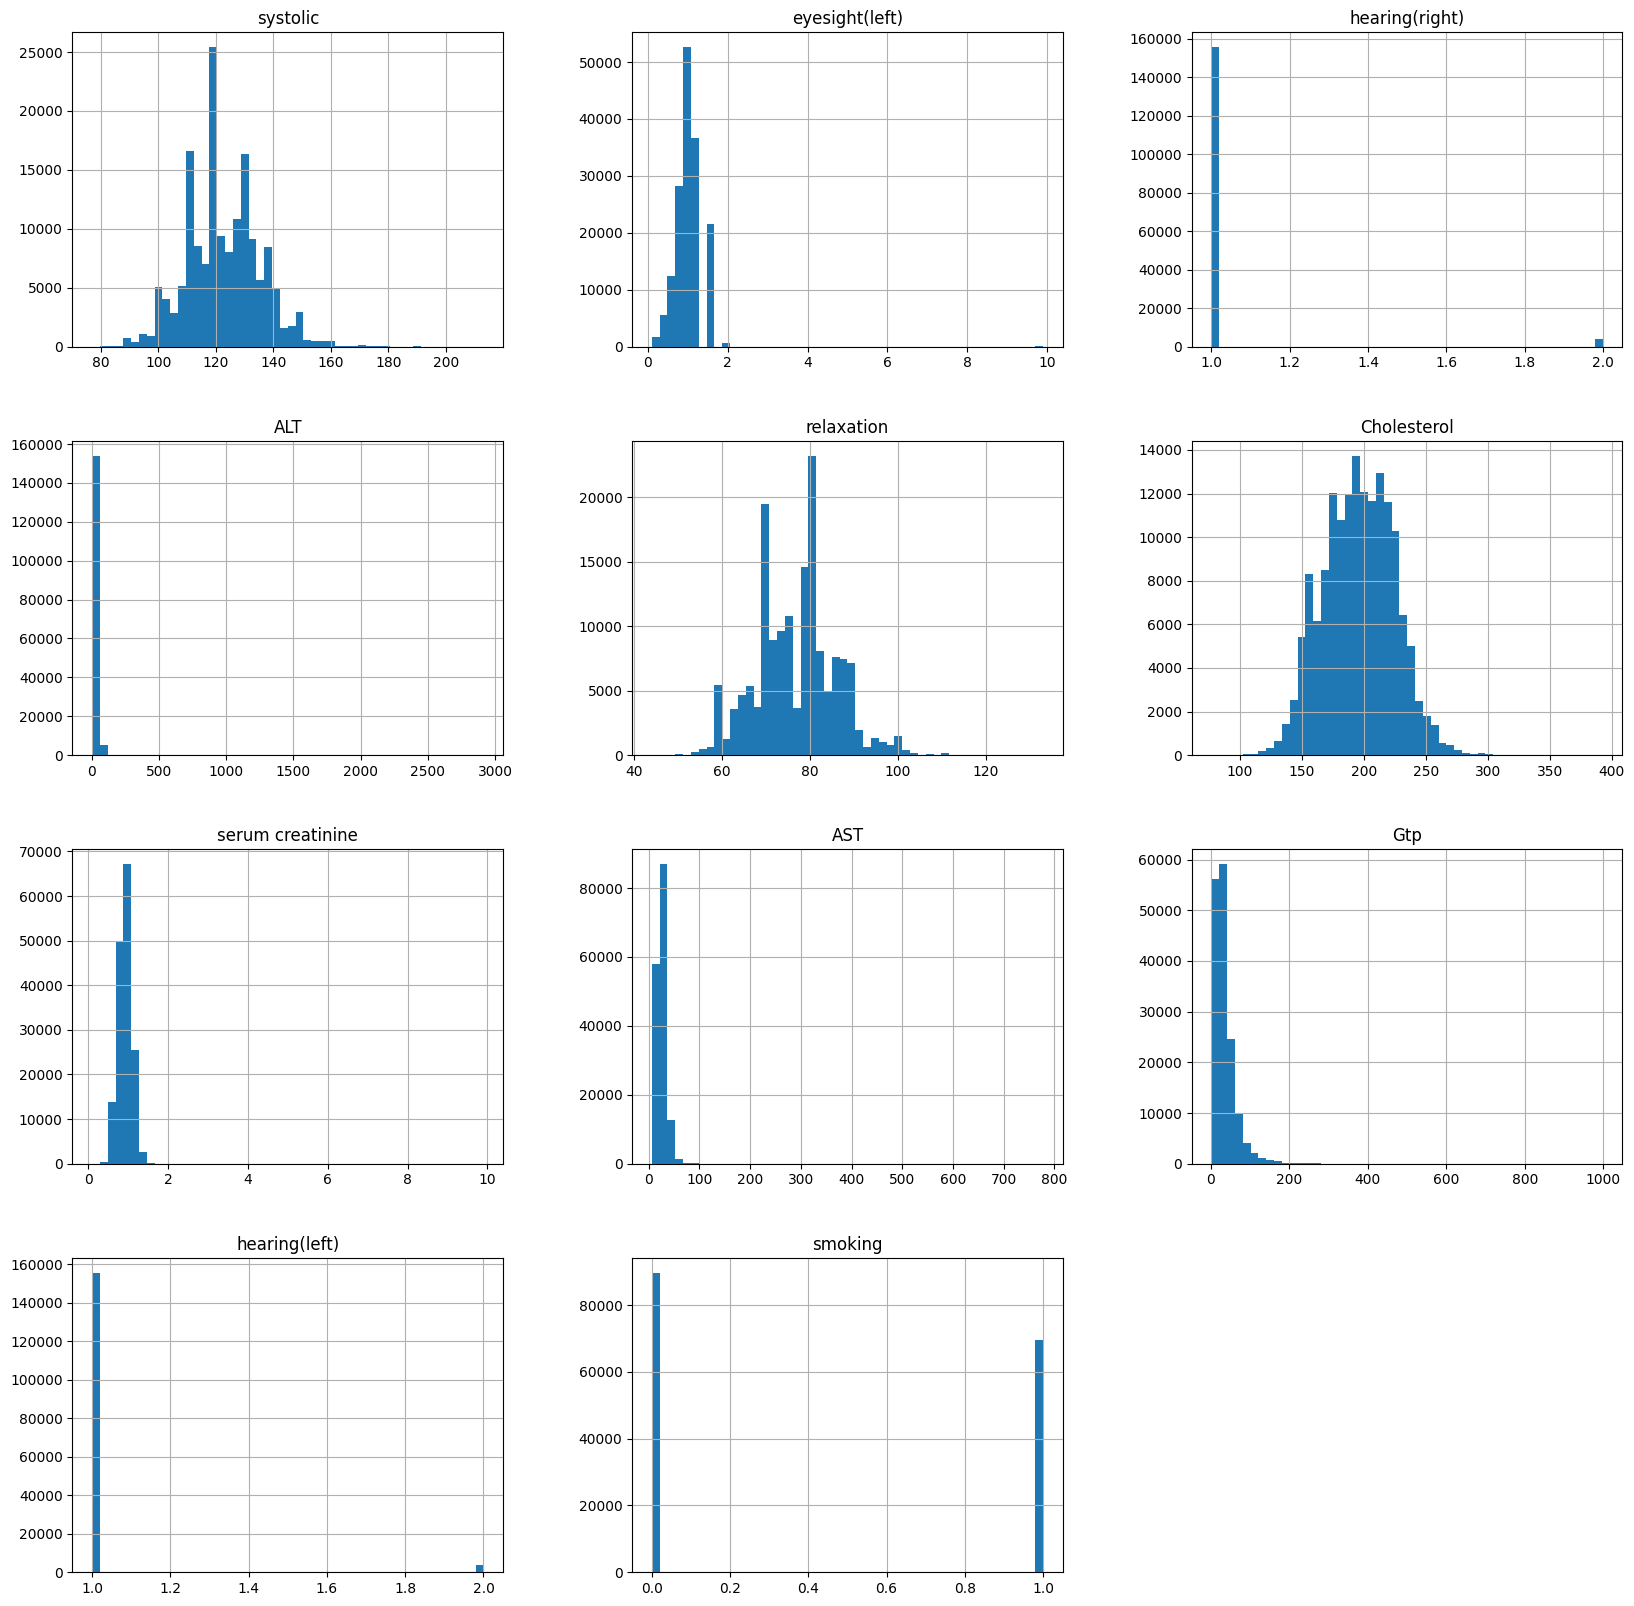

In [16]:
df.hist(bins=50, figsize=(20,20))

2. Summary statistics per feature

In [19]:
print(df.describe())

            systolic  eyesight(left)  hearing(right)            ALT  \
count  159256.000000   159256.000000   159256.000000  159256.000000   
mean      122.503648        1.005798        1.023421      26.550296   
std        12.729315        0.402113        0.151238      17.753070   
min        77.000000        0.100000        1.000000       1.000000   
25%       114.000000        0.800000        1.000000      16.000000   
50%       121.000000        1.000000        1.000000      22.000000   
75%       130.000000        1.200000        1.000000      32.000000   
max       213.000000        9.900000        2.000000    2914.000000   

          relaxation    Cholesterol  serum creatinine            AST  \
count  159256.000000  159256.000000     159256.000000  159256.000000   
mean       76.874071     195.796165          0.892764      25.516853   
std         8.994642      28.396959          0.179346       9.464882   
min        44.000000      77.000000          0.100000       6.000000   


3. Visualizing mean per feature

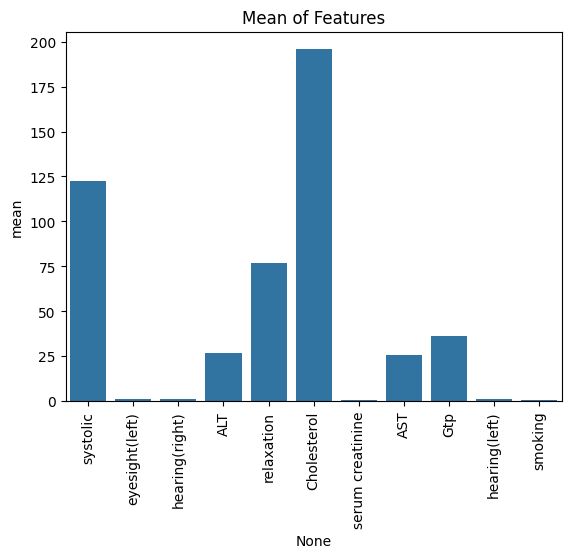

In [20]:
desc = df.describe().transpose() #transpose so that features are rows

sns.barplot(x=desc.index, y=desc['mean'])
plt.xticks(rotation=90)
plt.title('Mean of Features')
plt.show()

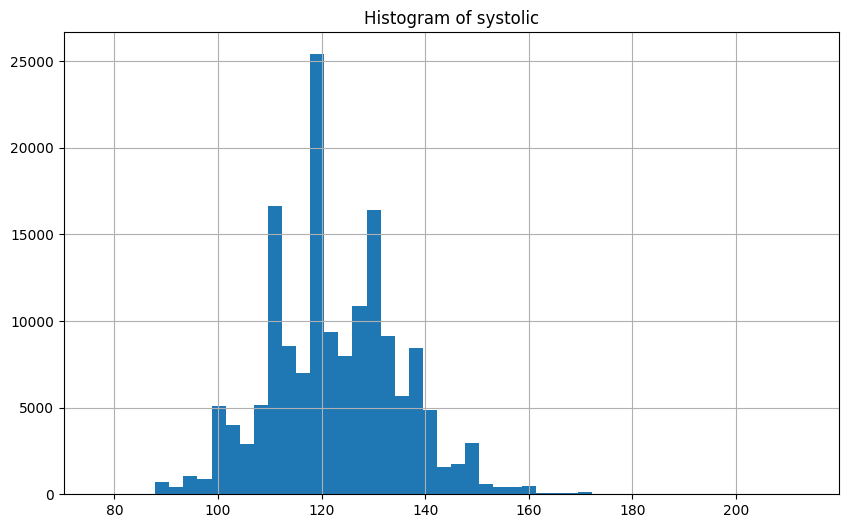

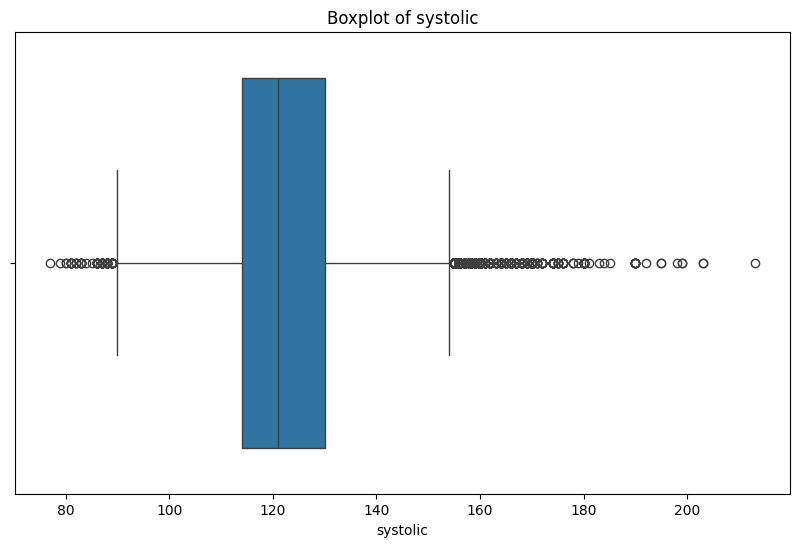


Descriptive stats for systolic:
count    159256.000000
mean        122.503648
std          12.729315
min          77.000000
25%         114.000000
50%         121.000000
75%         130.000000
max         213.000000
Name: systolic, dtype: float64
Skewness of systolic: 0.21992481204281342
Kurtosis of systolic: 0.21205237030470858
0         0.981702
1         1.845852
2        -0.353802
3         0.667465
4        -0.118125
            ...   
159251    0.353229
159252   -0.196684
159253   -0.668039
159254   -0.118125
159255    0.196111
Name: systolic, Length: 159256, dtype: float64


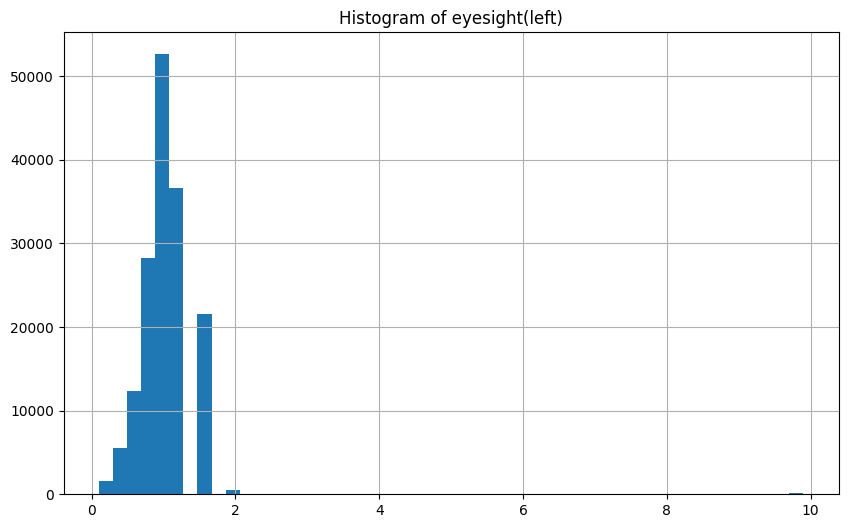

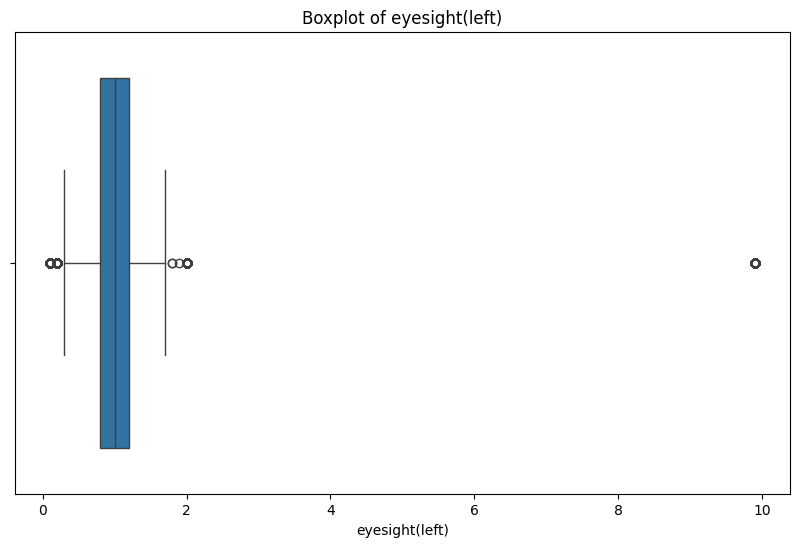


Descriptive stats for eyesight(left):
count    159256.000000
mean          1.005798
std           0.402113
min           0.100000
25%           0.800000
50%           1.000000
75%           1.200000
max           9.900000
Name: eyesight(left), dtype: float64
Skewness of eyesight(left): 8.890572430701148
Kurtosis of eyesight(left): 196.4654686805755
0        -1.257856
1        -1.009169
2        -1.506543
3         1.229017
4         1.229017
            ...   
159251    1.229017
159252   -0.014419
159253    1.229017
159254    0.482955
159255   -0.014419
Name: eyesight(left), Length: 159256, dtype: float64


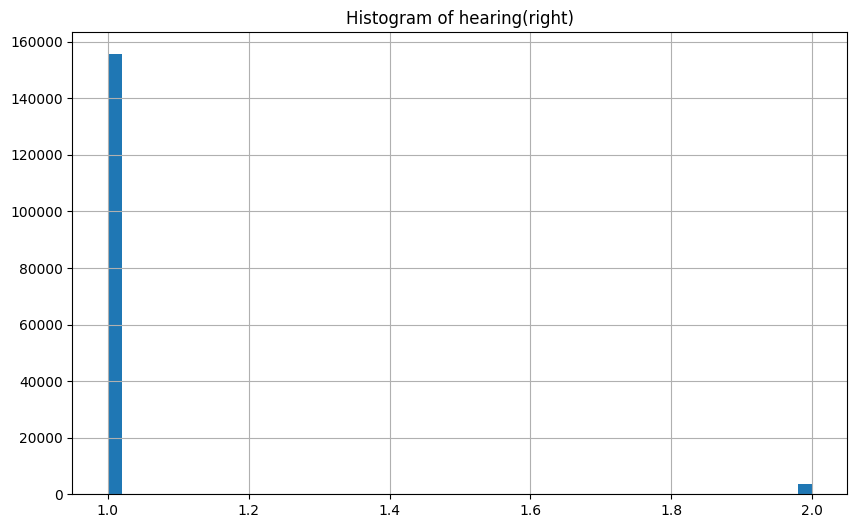

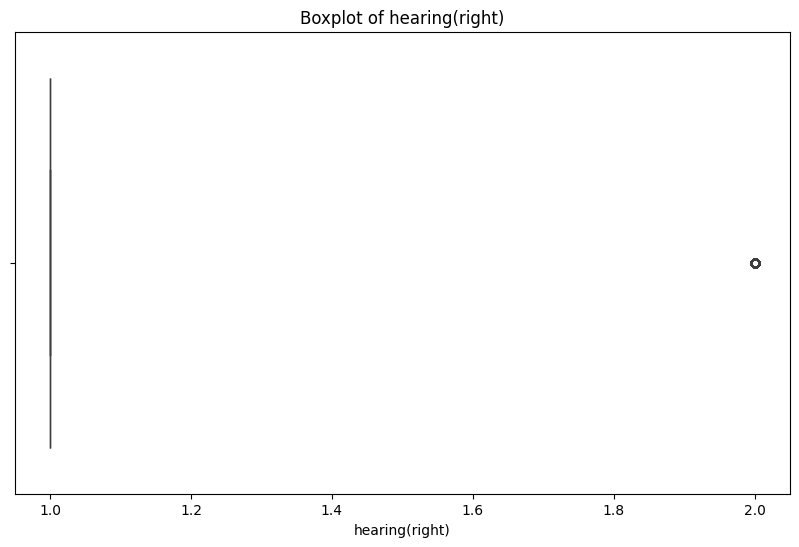


Descriptive stats for hearing(right):
count    159256.000000
mean          1.023421
std           0.151238
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hearing(right), dtype: float64
Skewness of hearing(right): 6.302436824084392
Kurtosis of hearing(right): 37.721183638999484
0        -0.154865
1         6.457242
2        -0.154865
3        -0.154865
4        -0.154865
            ...   
159251   -0.154865
159252   -0.154865
159253   -0.154865
159254   -0.154865
159255   -0.154865
Name: hearing(right), Length: 159256, dtype: float64


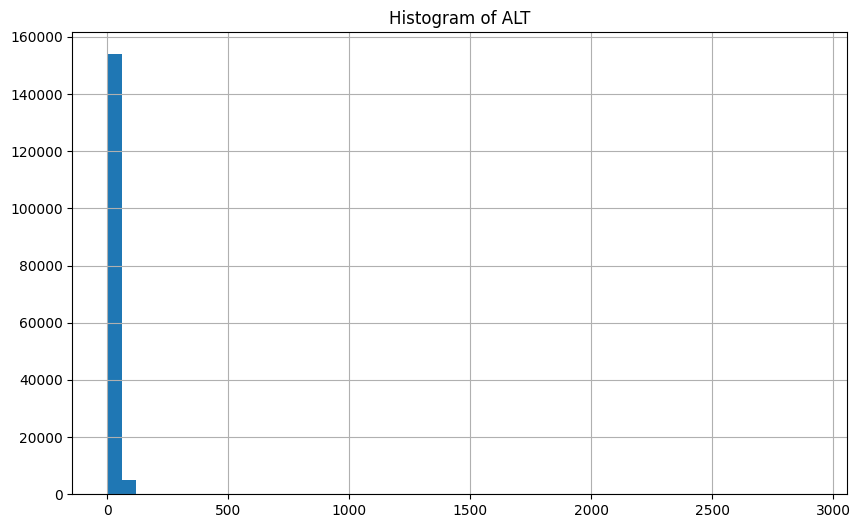

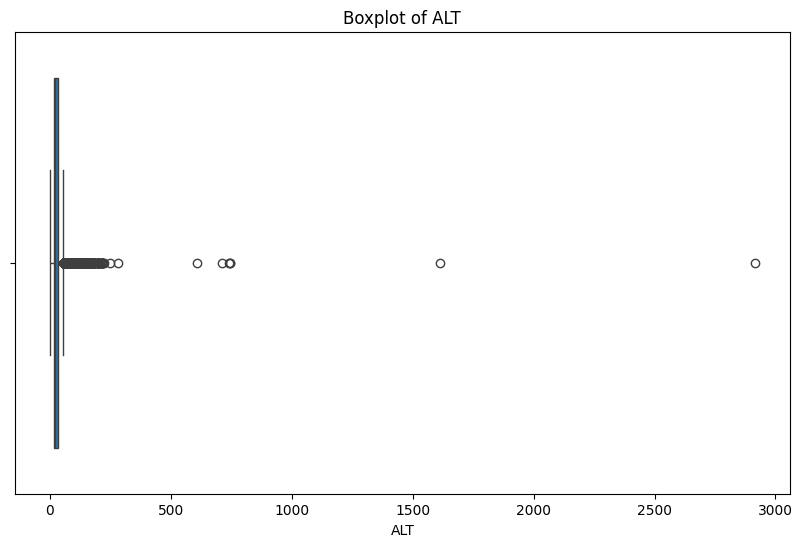


Descriptive stats for ALT:
count    159256.000000
mean         26.550296
std          17.753070
min           1.000000
25%          16.000000
50%          22.000000
75%          32.000000
max        2914.000000
Name: ALT, dtype: float64
Skewness of ALT: 34.8300119320999
Kurtosis of ALT: 4870.241909045784
0        -0.087326
1        -0.199983
2         0.250645
3         0.025331
4        -0.763267
            ...   
159251   -0.030997
159252   -0.368968
159253   -0.988581
159254   -0.537954
159255   -0.594282
Name: ALT, Length: 159256, dtype: float64


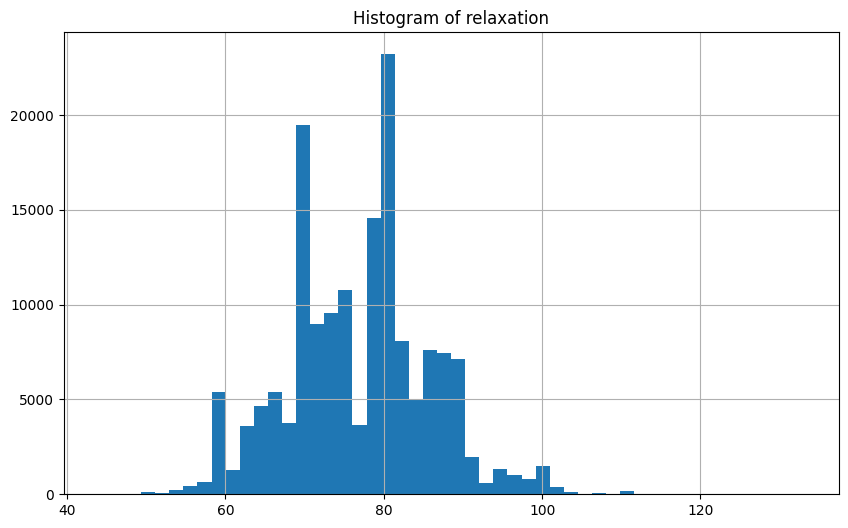

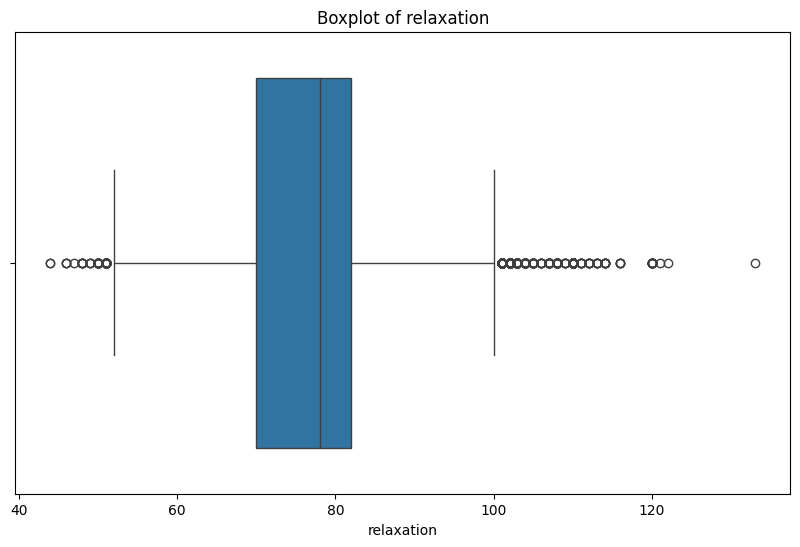


Descriptive stats for relaxation:
count    159256.000000
mean         76.874071
std           8.994642
min          44.000000
25%          70.000000
50%          78.000000
75%          82.000000
max         133.000000
Name: relaxation, dtype: float64
Skewness of relaxation: 0.17634977480941716
Kurtosis of relaxation: 0.14220138990160525
0         1.125777
1         0.681066
2        -0.208355
3         1.236955
4        -0.097177
            ...   
159251    0.347533
159252    0.347533
159253   -0.764243
159254    1.459310
159255    1.125777
Name: relaxation, Length: 159256, dtype: float64


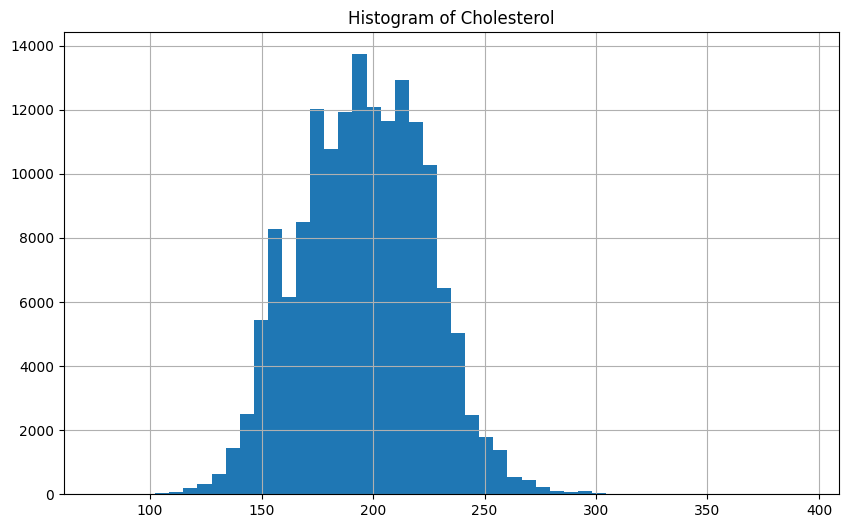

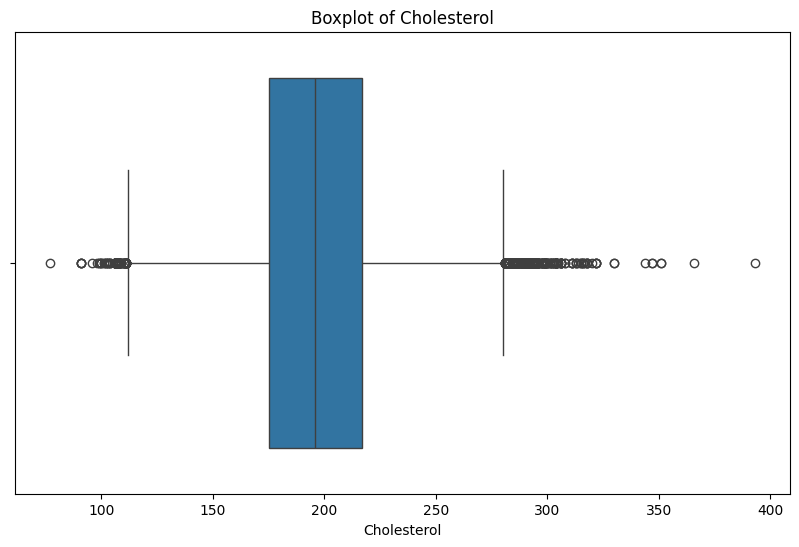


Descriptive stats for Cholesterol:
count    159256.000000
mean        195.796165
std          28.396959
min          77.000000
25%         175.000000
50%         196.000000
75%         217.000000
max         393.000000
Name: Cholesterol, dtype: float64
Skewness of Cholesterol: 0.043487788578322334
Kurtosis of Cholesterol: -0.20628096571151744
0        -0.837985
1        -0.063252
2        -0.626695
3        -0.556264
4        -1.436643
            ...   
159251    1.486214
159252    0.605836
159253   -0.239328
159254   -1.084492
159255   -0.344973
Name: Cholesterol, Length: 159256, dtype: float64


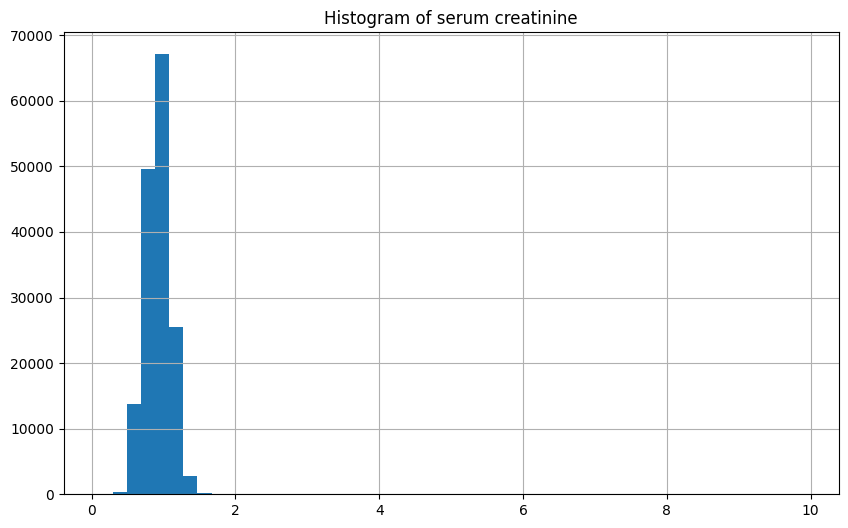

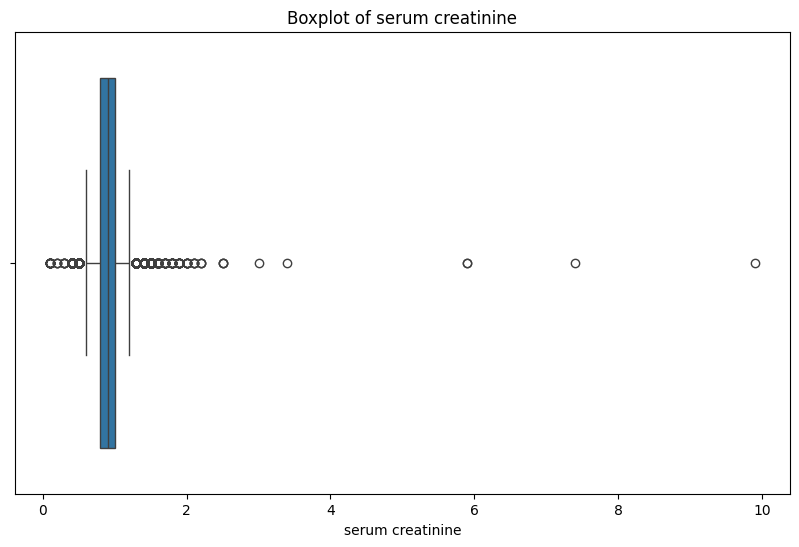


Descriptive stats for serum creatinine:
count    159256.000000
mean          0.892764
std           0.179346
min           0.100000
25%           0.800000
50%           0.900000
75%           1.000000
max           9.900000
Name: serum creatinine, dtype: float64
Skewness of serum creatinine: 1.5110590703323046
Kurtosis of serum creatinine: 58.93147789429243
0         0.597927
1         1.155511
2        -0.517239
3         0.597927
4        -0.517239
            ...   
159251   -0.517239
159252   -1.632406
159253   -1.632406
159254    1.155511
159255   -0.517239
Name: serum creatinine, Length: 159256, dtype: float64


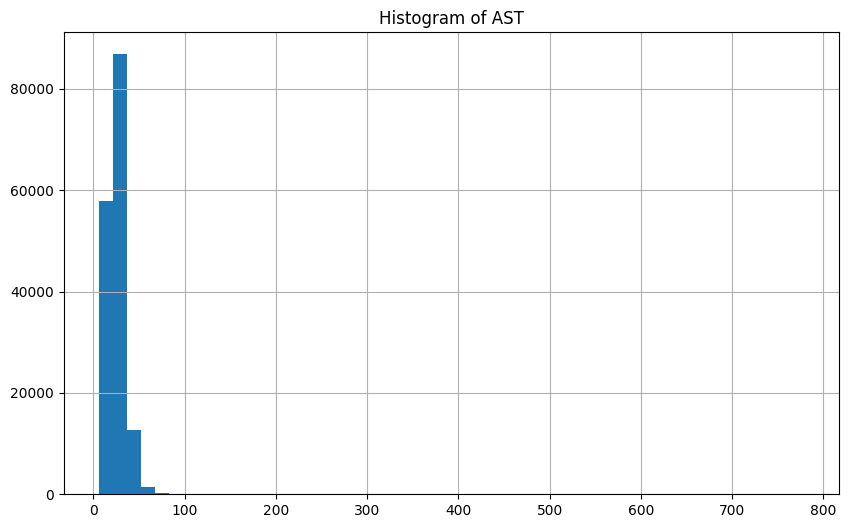

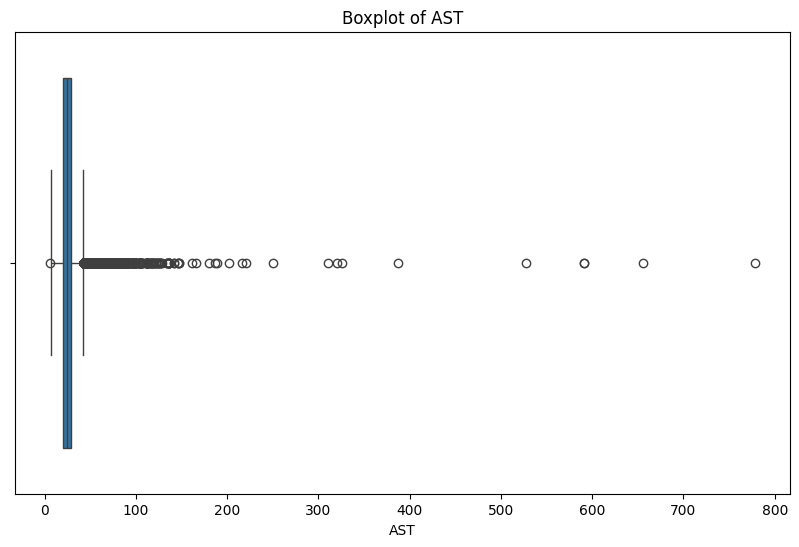


Descriptive stats for AST:
count    159256.000000
mean         25.516853
std           9.464882
min           6.000000
25%          20.000000
50%          24.000000
75%          29.000000
max         778.000000
Name: AST, dtype: float64
Skewness of AST: 11.59234569223128
Kurtosis of AST: 629.5193319842189
0        -0.371570
1         0.156700
2         0.156700
3        -0.582878
4        -0.688532
            ...   
159251   -0.054608
159252   -0.477224
159253   -1.111148
159254   -0.371570
159255   -0.477224
Name: AST, Length: 159256, dtype: float64


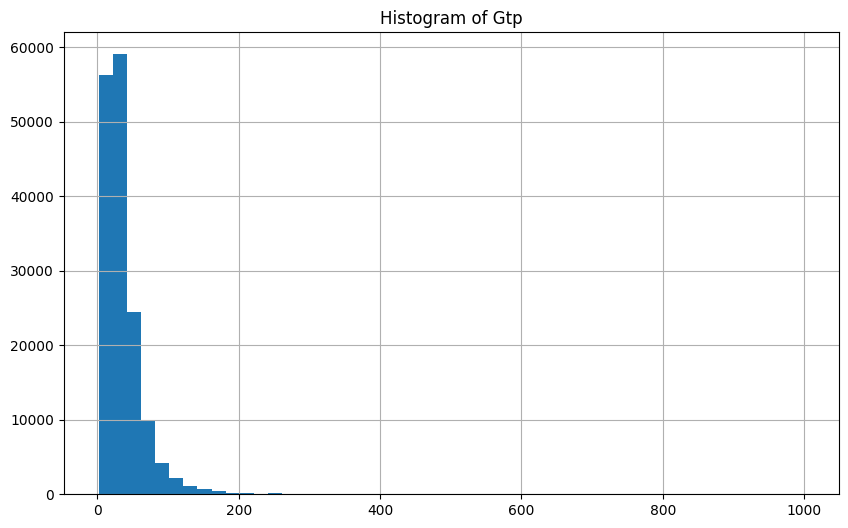

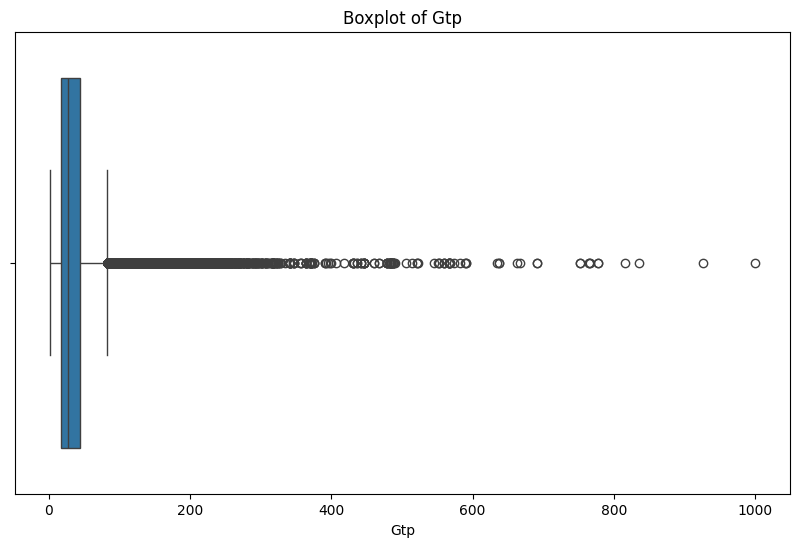


Descriptive stats for Gtp:
count    159256.000000
mean         36.216004
std          31.204643
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: Gtp, dtype: float64
Skewness of Gtp: 5.414827255969211
Kurtosis of Gtp: 69.55842824507344
0        -0.295342
1         0.025124
2         0.537870
3        -0.199202
4        -0.615808
            ...   
159251   -0.743994
159252   -0.583761
159253   -0.776041
159254    0.025124
159255   -0.615808
Name: Gtp, Length: 159256, dtype: float64


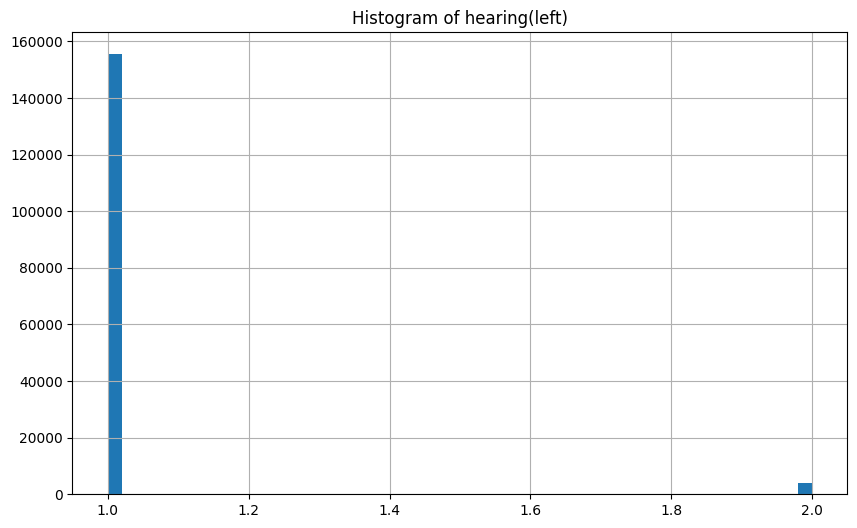

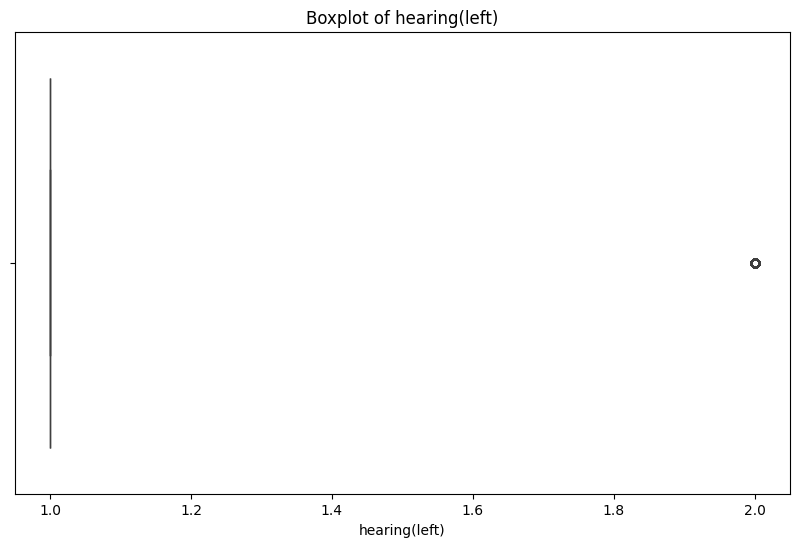


Descriptive stats for hearing(left):
count    159256.000000
mean          1.023974
std           0.152969
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hearing(left), dtype: float64
Skewness of hearing(left): 6.2239202761990695
Kurtosis of hearing(left): 36.737644970237824
0        -0.156725
1         6.380587
2        -0.156725
3        -0.156725
4        -0.156725
            ...   
159251   -0.156725
159252   -0.156725
159253   -0.156725
159254   -0.156725
159255   -0.156725
Name: hearing(left), Length: 159256, dtype: float64


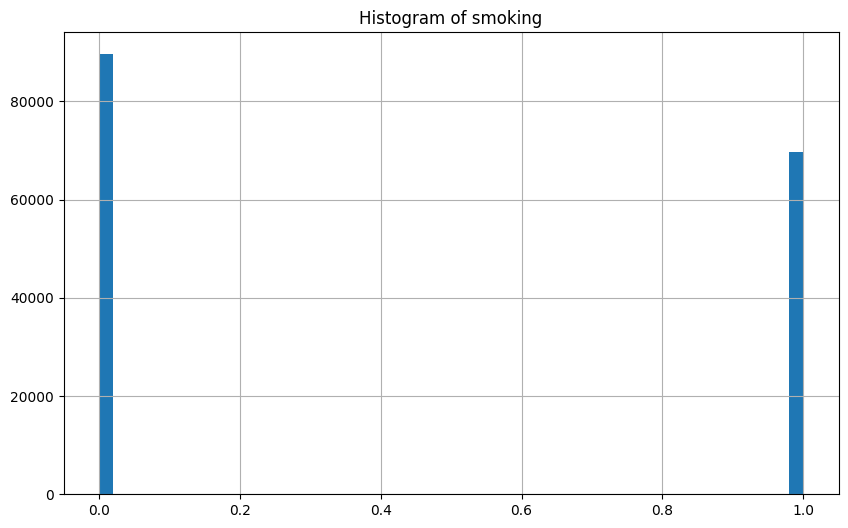

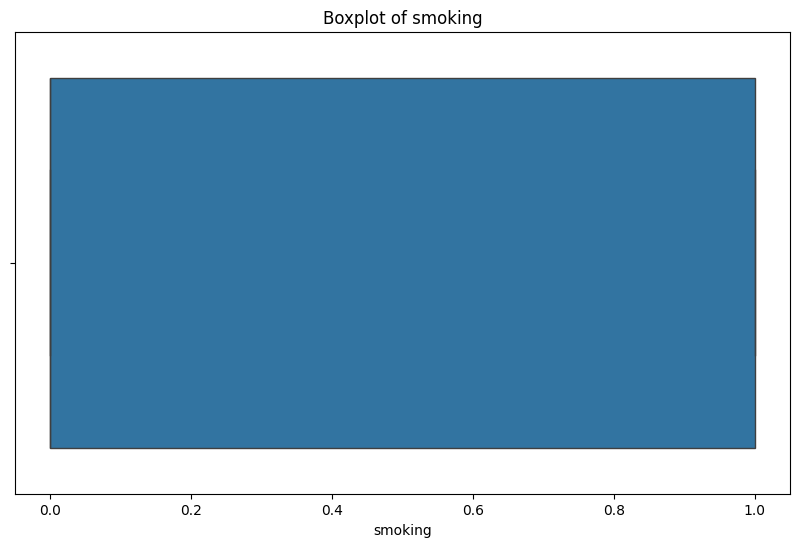


Descriptive stats for smoking:
count    159256.000000
mean          0.437365
std           0.496063
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: smoking, dtype: float64
Skewness of smoking: 0.25253164169326314
Kurtosis of smoking: -1.93625208632293
0         1.134204
1        -0.881675
2         1.134204
3        -0.881675
4         1.134204
            ...   
159251   -0.881675
159252   -0.881675
159253   -0.881675
159254    1.134204
159255   -0.881675
Name: smoking, Length: 159256, dtype: float64


In [27]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:

    # 1. Histogram
    plt.figure(figsize=(10,6))
    df[column].hist(bins=50)
    plt.title(f"Histogram of {column}")
    plt.show()

    # 2. Boxplot
    # displaying central tendency, spread, and potential outliers
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

    # 3. Descriptive Statistics
    print(f"\nDescriptive stats for {column}:")
    print(df[column].describe())
    
    # 4. Checking el skewness and kurtosis?
    # Skewness: measuring tiltness/ asymmetry

    # Skewness > 0: Right-skewed
    # Skewness < 0: Left-skewed
    # Skewness ≈ 0: Symmetrical

    # Kurtosis:  sharpness of the peak of the distribution
    
    # Kurtosis > 0: More outliers and heavy tails (leptokurtic).
    # Kurtosis < 0: Fewer outliers and lighter tails (platykurtic).
    # Kurtosis ≈ 0: Normal distribution (mesokurtic).

    print(f"Skewness of {column}: {df[column].skew()}")
    print(f"Kurtosis of {column}: {df[column].kurt()}")

    print(st.zscore(df[column]))


0         1.134204
1        -0.881675
2         1.134204
3        -0.881675
4         1.134204
            ...   
159251   -0.881675
159252   -0.881675
159253   -0.881675
159254    1.134204
159255   -0.881675
Name: smoking, Length: 159256, dtype: float64


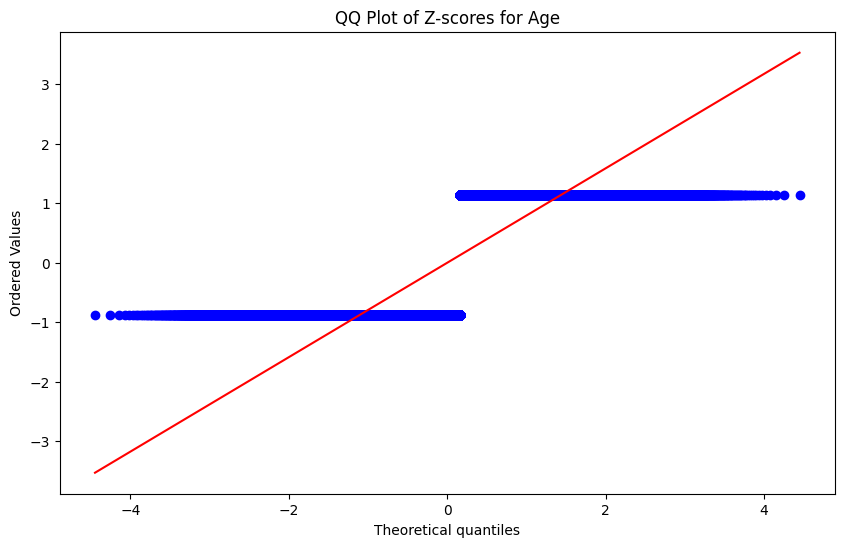

In [29]:
print(st.zscore(df[column]))

# QQ plot to check normality of Z-scores
plt.figure(figsize=(10, 6))
st.probplot(st.zscore(df[column]), dist="norm", plot=plt)
plt.title("QQ Plot of Z-scores for Age")
plt.show()


### Multivariate Analysis

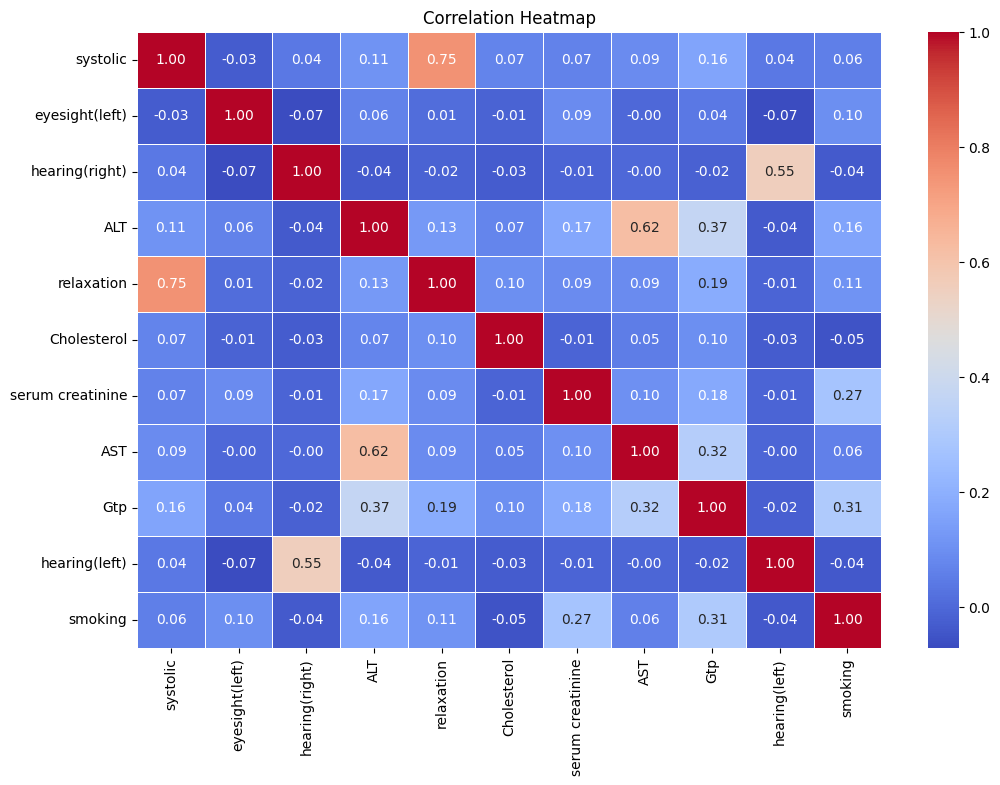

In [14]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Resources:
1. [Data Analysis](https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/)